# Palettes
1. matplotlib

In [21]:
# Standard Libs
import random
import datetime
from typing import Union, Optional, Any, Literal, Sequence, TypeAlias

# Third-party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Custom types for non-included typing annotations
IndexElement: TypeAlias = Union[str, int, float, pd.Timestamp]

In [22]:
# Data
dic = {str(i): 1 for i in range(20)}
sr = pd.Series(dic)
# sr

# d2 = {str(i): 1 + i * 0.01 for i in range(20)}
# s2 = pd.Series(d2)
# s2

In [23]:
def to_series(
    data: Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame],
    index: Optional[Union[pd.Index, Sequence[IndexElement]]] = None,
    name: Optional[str] = None
) -> pd.Series:
    """
    Converts input data into a pandas Series with optional custom index and name.

    This function standardizes various data types into a pandas Series. It supports
    arrays, dictionaries, lists, sets, DataFrames, and existing Series. Optionally,
    a custom index or series name can be assigned.

    Parameters:
        data (Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame]):
            Input data to convert. Supported types:
            - pd.Series: returned as-is (can be overridden with new index/name).
            - np.ndarray: flattened and converted to a Series.
            - dict: keys become the index, values become the data.
            - list or set: converted to a Series with default integer index.
            - pd.DataFrame:
                - 1 column: converted directly to a Series.
                - 2 columns: first column becomes the index, second becomes the values.
        index (Union[pd.Index, Sequence], optional): Custom index to assign to the Series.
            If provided, overrides the original index. Default is None.
        name (str, optional): Name to assign to the Series. Default is None.

    Returns:
        pd.Series: A pandas Series constructed from the input data, with optional
            custom index and name.

    Raises:
        TypeError: If the input data type is not supported.
        ValueError: If the DataFrame has more than 2 columns.

    Examples:
        >>> import pandas as pd
        >>> to_series([1, 2, 3, 4])
        0    1
        1    2
        2    3
        3    4
        dtype: int64

        >>> to_series({'A': 10, 'B': 20, 'C': 30})
        A    10
        B    20
        C    30
        dtype: int64

        >>> df = pd.DataFrame({'Label': ['X', 'Y'], 'Value': [100, 200]})
        >>> to_series(df)
        Label
        X    100
        Y    200
        Name: Value, dtype: int64

        >>> to_series([10, 20, 30], index=['a', 'b', 'c'], name='Measurements')
        a    10
        b    20
        c    30
        Name: Measurements, dtype: int64
    """
    
    # Validate parameters - FUTURE
    
    if isinstance(data, pd.Series):                 # If series is already a Series no conversion needed
        series = data                                  
    elif isinstance(data, np.ndarray):              # If data is a NumPy array   
        series = pd.Series(data.flatten())
    elif isinstance(data, (dict, list)):
        series = pd.Series(data)
    elif isinstance(data, (set)):
        series = pd.Series(list(data))
    elif isinstance(data, pd.DataFrame):
        if data.shape[1] == 1:                      # Also len(data.columns == 1)
            series = data.iloc[:, 0]
        elif data.shape[1] == 2:                    # Index: first col, Data: 2nd Col
            series = data.set_index(data.columns[0])[data.columns[1]]
        else:
            raise ValueError("DataFrame must have 1 oer 2 columns. Categories and values for 2 columns cases.")
    else:
        raise TypeError(f"Unsupported data type: {type(data)}. "
                    "Supported types: pd.Series, np.ndarray, pd.DataFrame, dict, list, set, and pd.DataFrame")

    if name:
        series.name = name

    if index:
        series.index = index

    return series

In [ ]:
def get_colorblind_palette_list():
    """
    Retorna una lista de colores (hexadecimales) amigables para personas
    con daltonismo, equivalentes a sns.color_palette('colorblind').
    """
    return [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
        '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
        '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
        '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
        '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
        '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
    ]


def get_colors_list(palette: str, n_items: Optional[int] = 10) -> list[str]:
    """
    Return a valid matplotlib palette list 
    - 'colorblind' is a kind of sns.colorblind 
    - Quali (Cat) = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent', 'colorblind']
    - Sequen (Order) = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    - Diverg (MidPoint) = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    - Cyclic (Repeat)= ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    - Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']
    """
    if palette == 'colorblind':
        color_list = get_colorblind_palette_list()
    else:
        cmap = plt.get_cmap(palette, n_items)             # Use palette colormap
        color_list = [cmap(i) for i in range(n_items)]    # Get colors from the colormap

    return color_list

In [ ]:
def show_palettes(palette_group: str='Quali', n_items: int=15) -> plt.Figure:

    # Verified palette_group parameter
    if palette_group not in ['Quali', 'Sequen', 'Diverg', 'Cyclic', 'Mix']:
        raise ValueError(f"'palette_group' parameter not valid. Only valid 'Quali', 'Sequen', 'Diverg', 'Cyclic', 'Mix'. Got '{palette_group}'.")
    
    # Verified n_times parameter
    if n_items < 1 or n_items > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{palette_group}'.")
    n_items = int(n_items)

    # Palette Group lists
    Quali = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent']
    Sequen = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
    Diverg = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
    Cyclic = ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
    Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']

    sr = to_series({str(i): 1 for i in range(n_items)})

    for ptte in eval(palette_group):
        colors = get_colors_list(ptte)
        fig, ax = plt.subplots(figsize=(12, 1))
        ax.bar(sr.index, sr, color=colors)
        ax.set_ylabel(ptte)
        plt.show()

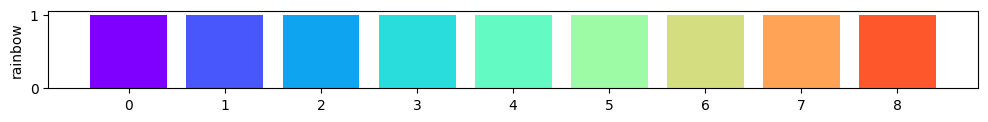

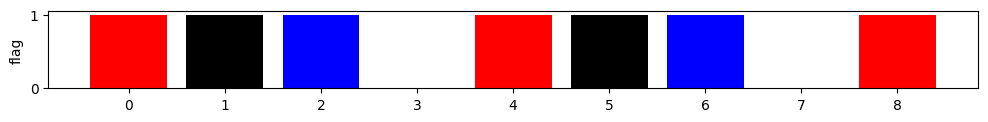

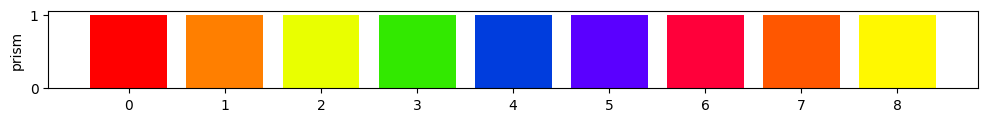

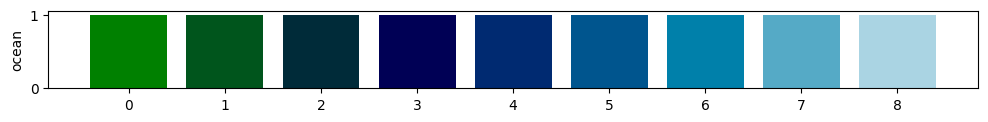

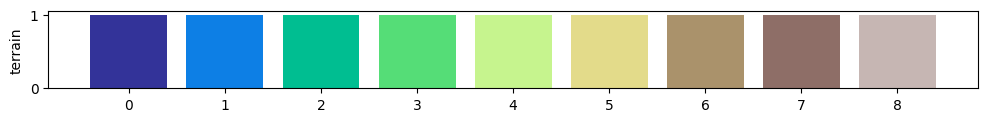

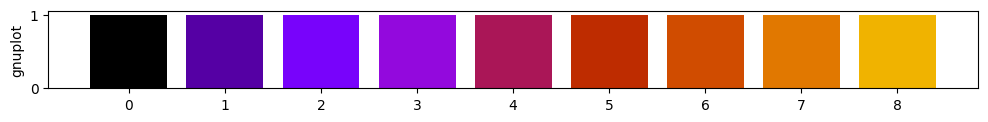

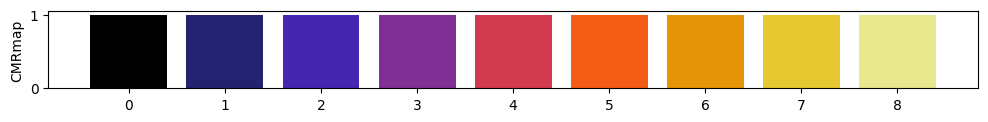

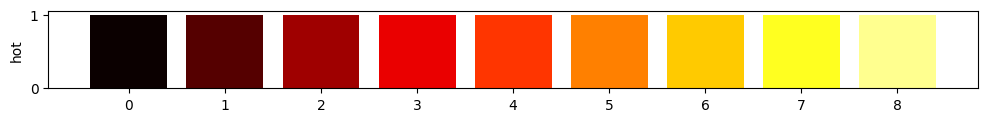

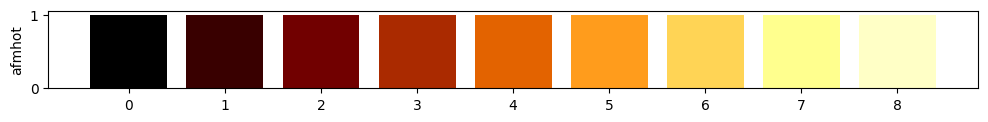

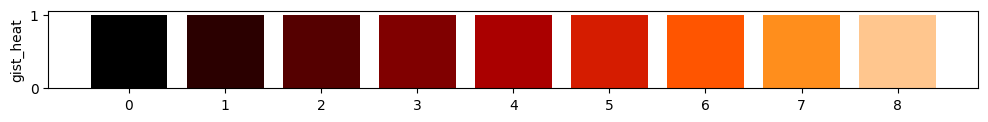

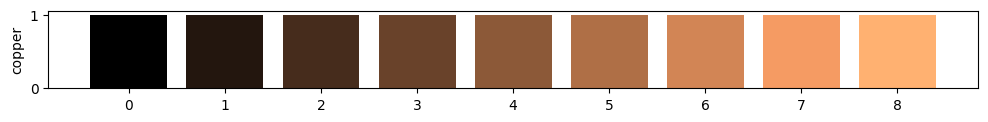

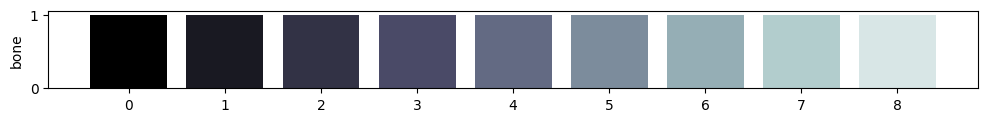

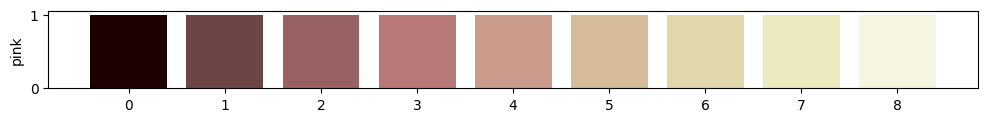

In [41]:
show_palette_group('Mix', n_items=9)

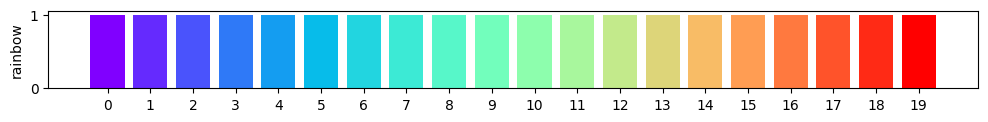

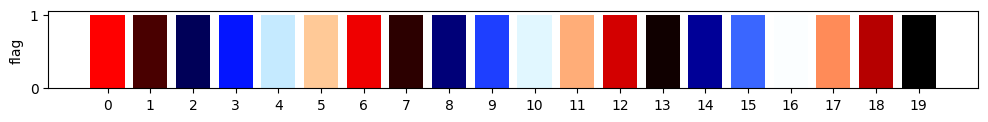

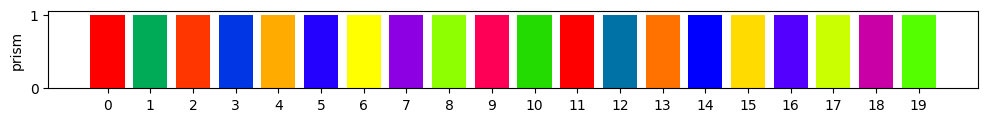

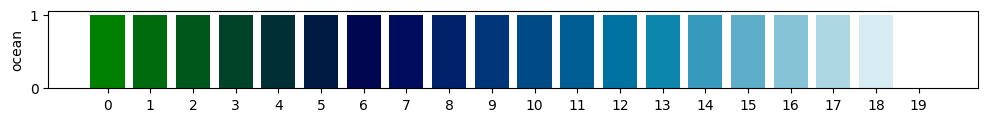

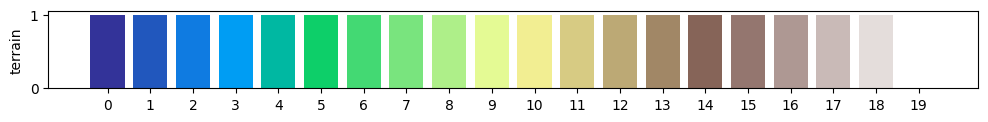

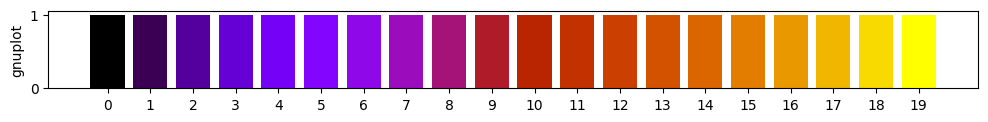

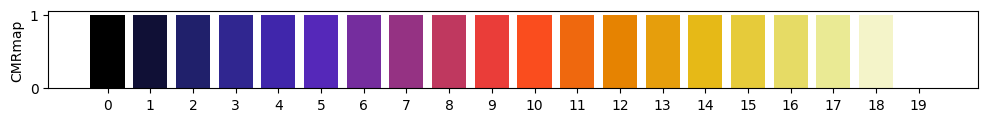

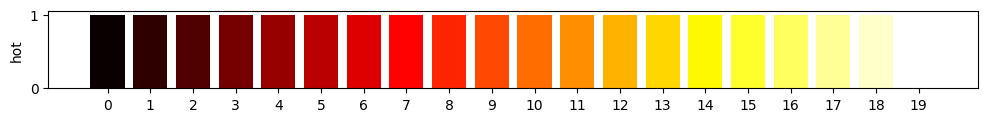

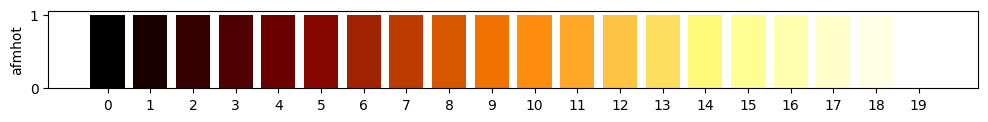

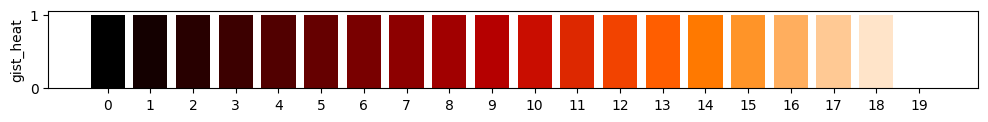

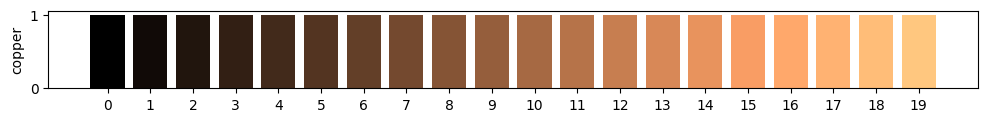

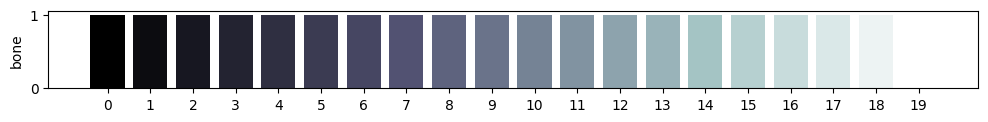

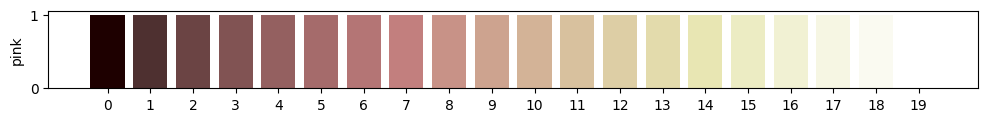

In [26]:
# Basic chart to show colors
def palette(sr, palette: str, n_items=20):

    cmap = plt.get_cmap(palette, n_items)
    colors = [cmap(i) for i in range(n_items)]
    # colors = plt.get_cmap(palette).colors[:n_items]

    fig, ax = plt.subplots(figsize=(12, 1))
    ax.bar(sr.index, sr, color=colors)
    ax.set_ylabel(palette)

    return fig, ax

# import matplotlib.colors as mcolors
# def palette2(sr, palette: str, n_items=20):

#     cmap = plt.get_cmap(palette)
#     norm = mcolors.Normalize(vmin=sr.min(), vmax=sr.max())
#     colors = cmap(norm(sr))

#     fig, ax = plt.subplots(figsize=(12, 1))
#     ax.bar(sr.index, sr, color=colors)
#     ax.set_ylabel(f"2-{palette}")

#     return fig, ax

Quali = ['tab10', 'tab20', 'Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2', 'Dark2', 'Paired', 'Accent']
Sequen = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
Diverg = ['coolwarm', 'bwr', 'seismic', 'PiYG', 'PRGn', 'BrBG', 'RdGy', 'RdBu', 'Spectral', 'RdYlGn', 'PuOr', 'RdYlBu']
Cyclic = ['twilight', 'twilight_shifted', 'hsv', 'turbo', 'cubehelix', 'gist_rainbow', 'jet', 'nipy_spectral', 'rainbow_r']
Mix = ['rainbow', 'flag', 'prism', 'ocean', 'terrain', 'gnuplot', 'CMRmap', 'hot', 'afmhot', 'gist_heat', 'copper', 'bone', 'pink']

# for ptte in Qualitatives + Sequential + Diverging:
for ptte in Mix:
    fig = palette(sr=sr, palette=ptte, n_items=len(sr))

# for series in (sr, s2):
#     fig = palette(sr=series, palette='tab10', n_items=len(sr))
#     fig = palette2(sr=series, palette='tab10', n_items=len(sr))

In [27]:
|

SyntaxError: invalid syntax (525519296.py, line 1)

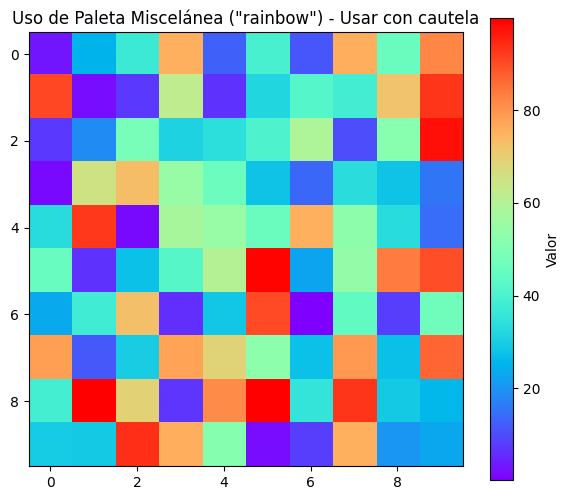

In [ ]:
# Reutilizamos los datos secuenciales para mostrar el efecto
datos_secuenciales = np.random.rand(10, 10) * 100

plt.figure(figsize=(7, 6))
plt.imshow(datos_secuenciales, cmap='rainbow')
plt.colorbar(label='Valor')
plt.title('Uso de Paleta Miscelánea ("rainbow") - Usar con cautela')
plt.show()

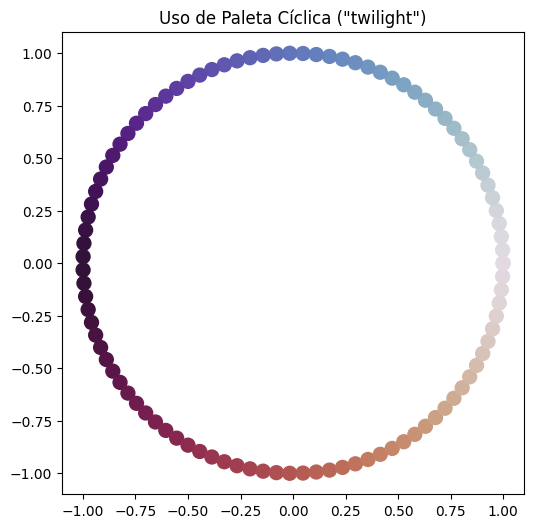

In [ ]:
# Datos que representan un ciclo (como ángulos de 0 a 2*pi)
angulos = np.linspace(0, 2 * np.pi, 100)
x = np.cos(angulos)
y = np.sin(angulos)
colores_ciclicos = angulos

plt.figure(figsize=(7, 6))
plt.scatter(x, y, c=colores_ciclicos, cmap='twilight', s=100)
plt.title('Uso de Paleta Cíclica ("twilight")')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

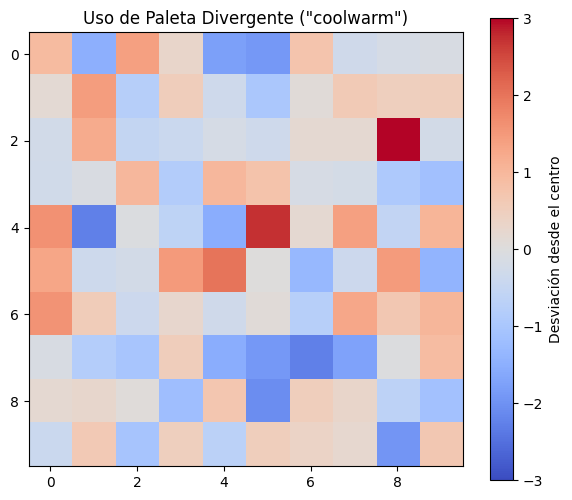

In [ ]:
# Datos 2D con valores positivos y negativos (centro en 0)
datos_divergentes = np.random.randn(10, 10)

plt.figure(figsize=(7, 6))
# El parámetro 'vmin' y 'vmax' ayuda a centrar la paleta
plt.imshow(datos_divergentes, cmap='coolwarm', vmin=-3, vmax=3)
plt.colorbar(label='Desviación desde el centro')
plt.title('Uso de Paleta Divergente ("coolwarm")')
plt.show()

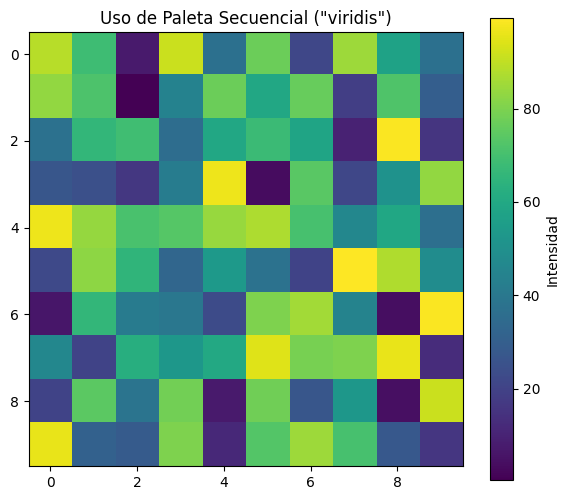

In [ ]:
# Datos 2D que van de bajo a alto
datos_secuenciales = np.random.rand(10, 10) * 100

plt.figure(figsize=(7, 6))
plt.imshow(datos_secuenciales, cmap='viridis')
plt.colorbar(label='Intensidad')
plt.title('Uso de Paleta Secuencial ("viridis")')
plt.show()

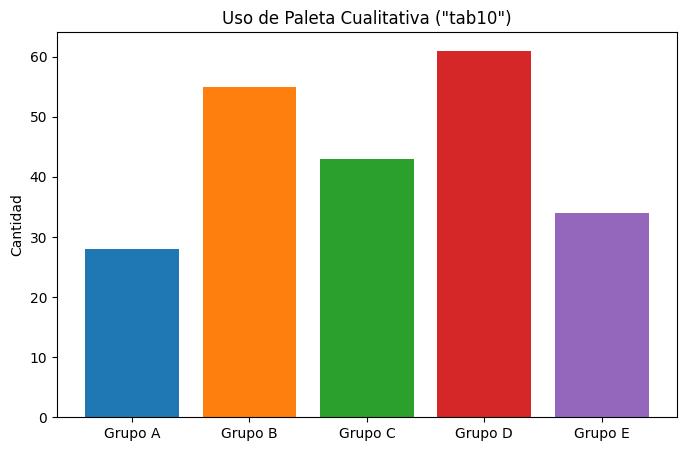

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para 5 categorías distintas
categorias = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']
valores = [28, 55, 43, 61, 34]

# Obtenemos 5 colores distintos de la paleta 'tab10'
colores = plt.get_cmap('tab10').colors

plt.figure(figsize=(8, 5))
plt.bar(categorias, valores, color=colores[:len(categorias)])
plt.title('Uso de Paleta Cualitativa ("tab10")')
plt.ylabel('Cantidad')
plt.show()

In [ ]:

cmap = plt.get_cmap('inferno',  20)
colors = [cmap(i) for i in range(10)]
print(colors)
cmap

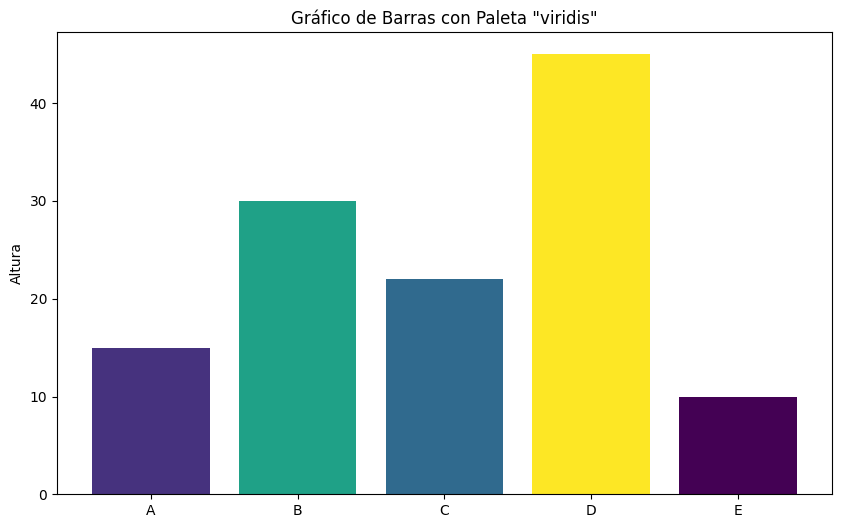

In [ ]:
import matplotlib.colors as mcolors

# 1. Datos de ejemplo
labels = ['A', 'B', 'C', 'D', 'E']
alturas = np.array([15, 30, 22, 45, 10])

# 2. Obtener la paleta (colormap) que queremos usar
cmap = plt.get_cmap('viridis')

# 3. Normalizar las alturas de las barras al rango 0-1
# Esto es crucial para que la paleta sepa qué color asignar a cada valor.
norm = mcolors.Normalize(vmin=alturas.min(), vmax=alturas.max())

# 4. Generar la lista de colores
# La paleta (cmap) es una función que, al recibir los valores normalizados,
# devuelve el color RGBA correspondiente a cada uno.
colores = cmap(norm(alturas))

# 5. Crear el gráfico y pasar la lista de colores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, alturas, color=colores)

ax.set_title('Gráfico de Barras con Paleta "viridis"')
ax.set_ylabel('Altura')
plt.show()

In [ ]:
# Datos de ejemplo
datos_matriz = np.random.rand(10, 10)

plt.figure(figsize=(8, 6))
plt.imshow(datos_matriz, cmap='inferno')
plt.colorbar(label='Intensidad')
plt.title('Mapa de Calor con la Paleta "inferno"')
plt.show()

In [ ]:
# Datos de ejemplo
x = np.random.rand(100)
y = np.random.rand(100)
colores = np.random.rand(100)  # Variable para el color
tamaños = 1000 * np.random.rand(100)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=colores, s=tamaños, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Valor de la Variable de Color')
plt.title('Gráfico de Dispersión con la Paleta "viridis"')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# First subplot
ax1.plot([1, 2, 3], [4, 5, 6], color='red')
ax1.set_title('First Plot')

# Second subplot
ax2.bar([1, 2, 3], [3, 2, 1], color='green')
ax2.set_title('Second Plot')

plt.tight_layout()
plt.show()